# aside_EDA_exploration_38871_game_id.IPyNb

### drive 마운트 / Import + 함수정의
- 코드를 사용해서 모듈 import 로 마운트 하거나
- 코랩 폴더에서 드라이브 마운트 클릭 하거나

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
# 데이터가 많아 5분 정도 걸립니다.
dir_base = '/home/yk/0325_Starcraft/competition/'

raw      = 'c03_starcraft_prediction/data_raw/'
remake   = 'c03_starcraft_prediction/data_remake/'
submit   = 'c03_starcraft_prediction/data_submit/'

### 사용함수의 정의

In [4]:
os.chdir(dir_base)
from _assets.modules import *


# OS 화일 및 DF 정보조회를 위한 탐색 모듈



### 마지막 경기 (id=38871) 만 따로 분석
 - 승률에 영향력있는 추가 파생변수 생성
 - 데이터가 너무 커서 3,100 개 데이터만 따로 뽑아서 살펴봄.

| 컬럼명  | 값    | type     | 설명                  | 비고   |
|:-------:|:------|----------|-----------------------|--------|
| game_id |33781  |int       |경기 구분 기호         | unique (multiple) 
| winner  |0.6523 |float     |player-1 승리확률      | 0.6287
| time    |2.24   |float     |경기시간 (60분법 구분) | 2분24초
| player  |0      |int       |player 0 - 첫번째 선수 
|         |1      |int       |player 1 - 두번째 선수          
| species |T      |Object    |테란 (Terran)    |     
|         |P      |Object    |프로토스 (Protos)|      
|         |Z      |Object    |저그 (Zerg)      |      
| event   |Ability           |Object |생산, 공격 등 선수의 주요 행동
|         |AddToControlGroup |Object |부대에 추가
|         |Camera            |Object |시점 선택
|         |ControlGroup      |Object |부대 행동
|         |GetControlGroup   |Object |부대 불러오기
|         |Right             |Object |Click : 마우스 우클릭
|         |Selection         |Object |객체 선택
|         |SetControlGroup   |Object |부대 지정
|event_contents|@(좌표, 등)  | object|이벤트에 관한 상세설명 


 

In [5]:
%%time
df_train = pd.read_csv(dir_base + raw + 'train.csv')

CPU times: user 43 s, sys: 3.7 s, total: 46.7 s
Wall time: 43.8 s


In [6]:
# game_id == 38871 만 골라서 따로 담은다.(데이터를 줄여서 살펴보기 위한 용도)
# 주의! = copy() 깊은 복사.
df_38871 = df_train[df_train['game_id'] == 38871].copy()

In [7]:
df_38871.shape      # (3108, 7)
df_38871.tail(50)

,game_id,winner,time,player,species,event,event_contents
67091726,38871,0,8.44,0,Z,Ability,(16E2) - BuildExtractor; Target: DestructibleS...
67091727,38871,0,8.45,0,Z,Camera,"at (129.5, 24.7578125)"
67091728,38871,0,8.45,0,Z,Camera,"at (157.5, 48.7578125)"
67091729,38871,0,8.45,0,Z,GetControlGroup,NaN
67091730,38871,0,8.45,1,T,Right Click,"Location: (73.5, 113.5, 40912)"
67091731,38871,0,8.46,1,T,Ability,"(102D) - BuildArmory; Location: (79.5, 114.5, ..."
67091732,38871,0,8.47,0,Z,Camera,"at (161.5, 19.7578125)"
67091733,38871,0,8.47,0,Z,Right Click,Target: DestructibleSignsFunny [004C0001]; Loc...
67091734,38871,0,8.47,0,Z,Right Click,Target: DestructibleSignsFunny [004C0001]; Loc...
67091735,38871,0,8.47,1,T,GetControlGroup,NaN


In [8]:
df_38871[df_38871['event_contents'].isna()].head(50)

,game_id,winner,time,player,species,event,event_contents
67088693,38871,0,0.06,0,Z,SetControlGroup,NaN
67088694,38871,0,0.06,0,Z,GetControlGroup,NaN
67088695,38871,0,0.06,0,Z,GetControlGroup,NaN
67088696,38871,0,0.07,0,Z,GetControlGroup,NaN
67088697,38871,0,0.07,0,Z,GetControlGroup,NaN
67088702,38871,0,0.08,0,Z,GetControlGroup,NaN
67088703,38871,0,0.08,0,Z,GetControlGroup,NaN
67088704,38871,0,0.08,0,Z,GetControlGroup,NaN
67088705,38871,0,0.08,0,Z,GetControlGroup,NaN
67088707,38871,0,0.09,0,Z,GetControlGroup,NaN


In [9]:
# 널값을 발생시키는 이벤트를 카운트 한다.
df_38871['event'][df_38871['event_contents'].isna()].value_counts()

GetControlGroup    820
ControlGroup        18
SetControlGroup     14
Name: event, dtype: int64

In [10]:
# 플레이어별 널값 발생빈도를 카운트 한다 == 무슨 의미인지 판단필요!
df_38871['player'][df_38871['event_contents'].isna()].value_counts()

0    456
1    396
Name: player, dtype: int64

In [11]:
# 좌표값을 이벤트 디테일로 발생시키는 이벤트를 카운트 한다 
df_38871['event'][df_38871['event_contents'].str.contains("at") == True].value_counts()

Camera         950
Right Click    724
Ability        111
Selection        8
Name: event, dtype: int64

In [12]:
# 질롯(승자)가 더 많은 이벤트를 발생시켰음 = [가설] 많이 움직이면 이긴다?
df_38871['species'].value_counts()

Z    1617
T    1491
Name: species, dtype: int64

In [13]:
# Player 0 (Z) 의 이벤트 분석 = 많이 움직이면 이길까?
# 어떤 이벤트를 많이 발생 시키면 이길까?
df_38871['event'][df_38871['player'] == 0].value_counts()

GetControlGroup    435
Right Click        411
Camera             366
Selection          303
Ability             81
ControlGroup        18
SetControlGroup      3
Name: event, dtype: int64

In [14]:
# player 1 (T) 의 이벤트 분석 = 적게 움직이면 이길까?
# 승자와 패자의 이벤트 경향을 분석하면 파생변수 1 = 생성
df_38871['event'][df_38871['player'] == 1].value_counts()

Camera             584
GetControlGroup    385
Right Click        313
Ability            102
Selection           96
SetControlGroup     11
Name: event, dtype: int64

### 특정 시간대의 특정 이벤트를 분석

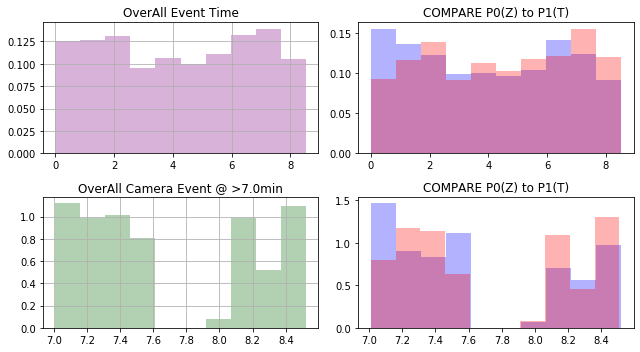

In [15]:
# 플롯 비교를 위한 딕셔너리 작성
_h = {
        '1' : df_38871['time'],                             # 전체 시간 카운트
    
        '2' : df_38871['time'][df_38871['player'] == 0],    # Player=0 의 이벤트 타임
        '3' : df_38871['time'][df_38871['player'] == 1],    # Player=1 의 이벤트 타임
    
    
        '4' : df_38871['time'][                             # 카메라 이벤트 타임, 7분 이상
                    (df_38871['event'] == 'Camera') &
                    (df_38871['time'] > 7.0)
                ],    
        '5' : df_38871['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_38871['event'] == 'Camera') &
                    (df_38871['player'] == 0) &
                    (df_38871['time'] > 7.0)
                ],    
        '6' : df_38871['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_38871['event'] == 'Camera') &
                    (df_38871['player'] == 1) &
                    (df_38871['time'] > 7.0)
                ],    
    }


fig, axes = plt.subplots(*(2,2), figsize=(9,5))

histit(axes, _h['1'], 1, 1,'Purple', 'OverAll Event Time')

histit(axes, _h['2'], 1, 2,'Blue')
histit(axes, _h['3'], 1, 2,'Red', 'COMPARE P0(Z) to P1(T)') # 오버랩은 맨 마지막에..

histit(axes, _h['4'], 2, 1,'DarkGreen', 'OverAll Camera Event @ >7.0min')
histit(axes, _h['5'], 2, 2,'Blue',)
histit(axes, _h['6'], 2, 2,'Red', 'COMPARE P0(Z) to P1(T)') # 오버랩은 맨 마지막에..

fig.tight_layout()

In [16]:
# 플레이어 0 의 시간대별 이벤트 발생횟수 카운트 = (종족 : Zilot)
# 중요한 시간대에 이벤트 발생횟수의 차이가 승률에 영향을 미칠것 [가정]

# 시간대 별로 이벤트 발생횟수를 카운트 해서 비교해 본다
# 1분 안에서 8 이벤트의 발생횟수 = 1분 단위로 쪼갠다

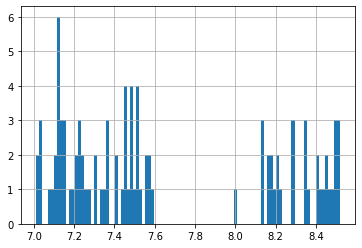

In [17]:
plt.hist(_h['5'], bins=100)
plt.grid()
plt.show()

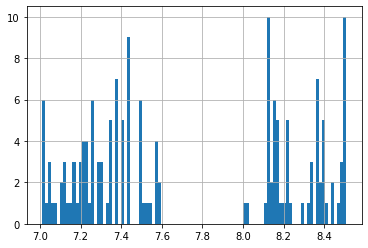

In [18]:
plt.hist(_h['6'], bins=100)
plt.grid()
plt.show()

## 결론 = 시간이 60분법이라 중간에 끊어지는 것으로 보인것 뿐임!
- 카메라 이벤트는 계속 끊이지 않고 발생하고 있었음.
- 생각했던 가정은 사실이 아님!... ㅠㅠ

In [ ]:
# 비닝의 차이로 카메라 이벤트가 끊어지지는 않는다. = 결론!

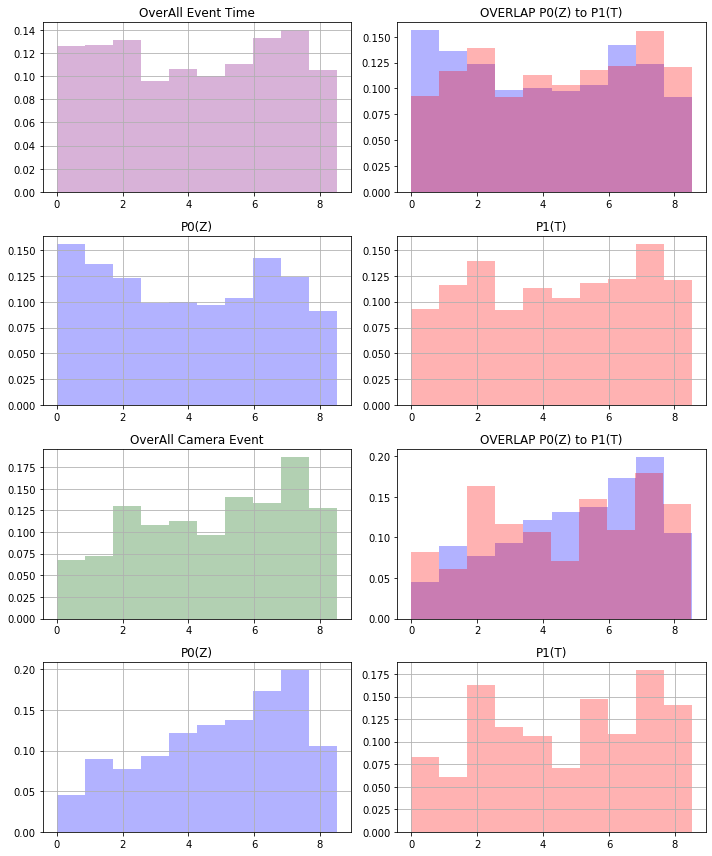

In [19]:
# 플롯 비교를 위한 딕셔너리 작성
_h = {
        '1' : df_38871['time'],                             # 전체 시간 카운트
    
        '2' : df_38871['time'][df_38871['player'] == 0],    # Player=0 의 이벤트 타임
        '3' : df_38871['time'][df_38871['player'] == 1],    # Player=1 의 이벤트 타임
    
    
        '4' : df_38871['time'][                             # 카메라 이벤트 타임, 7분 이상
                    (df_38871['event'] == 'Camera') 
                ],    
        '5' : df_38871['time'][                             # Player=0 의  카메라 이벤트 전체
                    (df_38871['event'] == 'Camera') &
                    (df_38871['player'] == 0) 
                ],    
        '6' : df_38871['time'][                             # Player=0 의  카메라 이벤트 전체
                    (df_38871['event'] == 'Camera') &
                    (df_38871['player'] == 1) 
                ],    
    }


fig, axes = plt.subplots(*(4,2), figsize=(10,12))

histit(axes, _h['1'], 1, 1,'Purple', 'OverAll Event Time')
histit(axes, _h['2'], 1, 2,'Blue')
histit(axes, _h['3'], 1, 2,'Red', 'OVERLAP P0(Z) to P1(T)') # 오버랩은 맨 마지막에..

histit(axes, _h['2'], 2, 1,'Blue', 'P0(Z)' )
histit(axes, _h['3'], 2, 2,'Red',  'P1(T)')


histit(axes, _h['4'], 3, 1,'DarkGreen', 'OverAll Camera Event')
histit(axes, _h['5'], 3, 2,'Blue',)
histit(axes, _h['6'], 3, 2,'Red', 'OVERLAP P0(Z) to P1(T)') # 오버랩은 맨 마지막에..

histit(axes, _h['5'], 4, 1,'Blue', 'P0(Z)')
histit(axes, _h['6'], 4, 2,'Red',  'P1(T)')


fig.tight_layout()

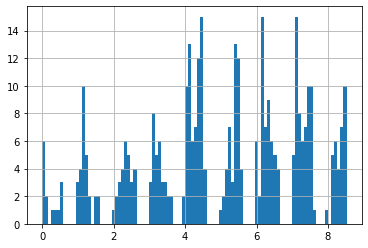

In [20]:
plt.hist(_h['5'], bins=100)
plt.grid()
plt.show()

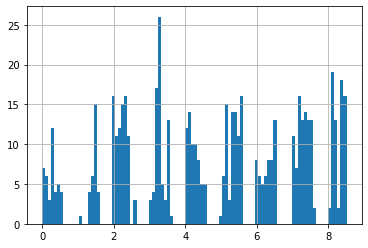

In [21]:
plt.hist(_h['6'], bins=100)
plt.grid()
plt.show()